# Quick start tutorial

The repository is at beta stage and more documentation will be coming soon! This tutorial only shows the most basic use case.

Let us first create a dense deformation and an affine transformation and compose them!

In [1]:
import torch
import matplotlib.pyplot as plt

from composable_mapping import GridDeformation
from composable_mapping.affine import Affine
from composable_mapping.coordinate_system import CoordinateSystem
from torchvision.transforms import GaussianBlur

coordinate_system = CoordinateSystem.centered_normalized(shape=(256, 256))
deformation = GridDeformation.from_tensor(
    GaussianBlur(kernel_size=21, sigma=7.0)(20 * torch.randn(1, 2, 256, 256)),
    coordinate_system=coordinate_system,
)
affine = Affine.from_matrix(torch.tensor([[0.7, 0.2, 0.0], [0.2, 0.9, 0.0], [0.0, 0.0, 1.0]]))
composition = deformation @ affine
deformation.visualize(emphasize_every_nth_line=(5, 0))
plt.title("Deformation")
plt.show()
GridDeformation(affine, coordinate_system).visualize(emphasize_every_nth_line=(5, 0))
plt.title("Affine")
plt.show()
composition.visualize(emphasize_every_nth_line=(5, 0))
plt.title("Composition")
plt.show()

ImportError: cannot import name 'Deformation' from 'composable_mapping.samplable_mapping' (/hdd/honkamj2/workspace/github/composable-mapping/src/composable_mapping/samplable_mapping.py)

Then let us apply the composed deformation to an image

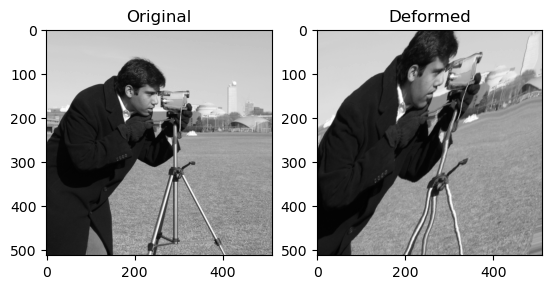

In [ ]:
from matplotlib.image import imread

from composable_mapping.samplable_mapping import GridVolume

image = torch.from_numpy(imread("../tutorials/camera.png"))[None, None]
continuous_image = GridVolume.from_tensor(
    image, coordinate_system=CoordinateSystem.centered_normalized(shape=image.shape[2:])
)
deformed_image = (continuous_image @ composition).sample_to(continuous_image)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image[0, 0], cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Deformed")
plt.imshow(deformed_image.generate_values()[0, 0], cmap="gray")

We also have the mask available which indicates which points have not been extrapolated from outside the original image.

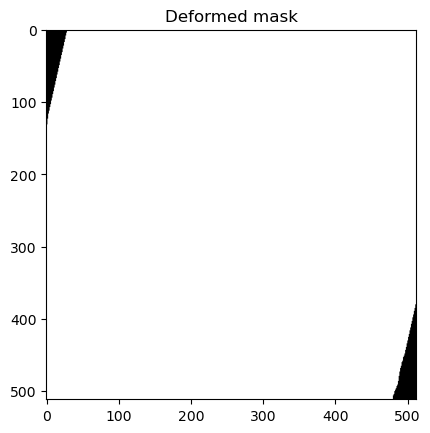

In [ ]:
plt.title("Deformed mask")
plt.imshow(deformed_image.generate_mask()[0, 0], cmap="gray")